In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [ ]:
### DATA PRE-processing###
df = pd.read_csv('data.csv',encoding = "ISO-8859-1")
df



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#check data type
print(df.info())

# Convert to DateTime Obj
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date  # only keep date

# check missing value
print(df.isnull().sum())

#drop all record without ID
df.dropna(subset=['CustomerID'],inplace=True)

# drop duplicate
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
dtype: int64


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [ ]:

# get all returned transaction
returnedTransac= df[df["Quantity"]<0]
#########################
### Creating RFM Table###
#########################

df['total_amount'] = df['Quantity']*df['UnitPrice']
dfpos = df[df['Quantity']>0]   # All transaction record with positive quantity

frequency = pd.DataFrame(dfpos.groupby("CustomerID").size()).set_axis(["Freq"],axis=1)

# calc returned frequency
returnFreq=pd.DataFrame(returnedTransac.groupby('CustomerID').size()).set_axis(['returnFreq'], axis=1)
#subtract total frequency from returned frequency
merged_df = pd.merge(frequency, returnFreq, on='CustomerID', how='left')
merged_df['net_Freq'] = merged_df['Freq'] - merged_df['returnFreq'].fillna(0)
print(merged_df)
frequency['Freq'] = merged_df['net_Freq']

del returnFreq



            Freq  returnFreq  net_Freq
CustomerID                            
12346.0        1         1.0       0.0
12347.0      182         NaN     182.0
12348.0       31         NaN      31.0
12349.0       73         NaN      73.0
12350.0       17         NaN      17.0
...          ...         ...       ...
18280.0       10         NaN      10.0
18281.0        7         NaN       7.0
18282.0       12         1.0      11.0
18283.0      721         NaN     721.0
18287.0       70         NaN      70.0

[4339 rows x 3 columns]


In [ ]:
monetary = pd.DataFrame(df.groupby("CustomerID")['total_amount'].sum()).set_axis(['total_M'],axis=1)

#recency
recency = pd.DataFrame(dfpos.groupby("CustomerID")['Date'].max()).set_axis(['invoiceDate'],axis=1)

#####
#one day or 2 day offset ???
#####
current_date = pd.to_datetime('2011-12-09').date() # Set the current day to the last date of the update
recency['Days'] = (current_date-recency['invoiceDate']).dt.days

recency.drop('invoiceDate',axis=1,inplace=True)
recency

,Days
CustomerID,
12346.0,325
12347.0,2
12348.0,75
12349.0,18
12350.0,310
...,...
18280.0,277
18281.0,180
18282.0,7


In [ ]:
rfm = pd.merge(recency,monetary,on='CustomerID')
rfm = pd.merge(rfm,frequency,on='CustomerID')
# del recency
# del monetary
# del merged_df

rfm

### remove outliers###
def cap_data(newdf):
    for col in newdf.columns:
        # print("capping the ",col)
        if (((newdf[col].dtype)=='float64') | ((newdf[col].dtype)=='int64')):
            percentiles = newdf[col].quantile([0.01,0.99]).values
            newdf[col][newdf[col] <= percentiles[0]] = percentiles[0]
            newdf[col][newdf[col] >= percentiles[1]] = percentiles[1]
        else:
            newdf[col]=newdf[col]
    return newdf

new_rfm=cap_data(rfm)
new_rfm

<ipython-input-7-4e48cf1582b4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[col][newdf[col] <= percentiles[0]] = percentiles[0]
<ipython-input-7-4e48cf1582b4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[col][newdf[col] >= percentiles[1]] = percentiles[1]


,Days,total_M,Freq
CustomerID,,,
12346.0,325.0,38.233,1.00
12347.0,2.0,4310.000,182.00
12348.0,75.0,1797.240,31.00
12349.0,18.0,1757.550,73.00
12350.0,310.0,334.400,17.00
...,...,...,...
18280.0,277.0,180.600,10.00
18281.0,180.0,80.820,7.00
18282.0,7.0,176.600,11.00


<Axes: xlabel='total_M'>

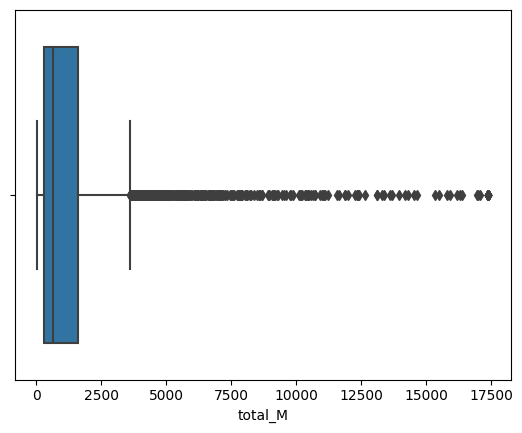

In [ ]:
import seaborn as sns
sns.boxplot(data=new_rfm,x='total_M')

In [ ]:
######Normalize by standard-scaler#####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_Normed = scaler.fit_transform(new_rfm)
rfm_Normed = pd.DataFrame(rfm_Normed,columns=['Recency','Monetary','Frequency'])
rfm_Normed

,Recency,Monetary,Frequency
0,2.332369,-0.581774,-0.718682
1,-0.901121,1.100935,0.922176
2,-0.170332,0.111124,-0.446717
3,-0.740948,0.095489,-0.065965
4,2.182207,-0.465109,-0.573634
...,...,...,...
4334,1.851851,-0.525693,-0.637093
4335,0.880803,-0.564998,-0.664289
4336,-0.851067,-0.527269,-0.628027
4337,-0.891110,0.208929,5.180432


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

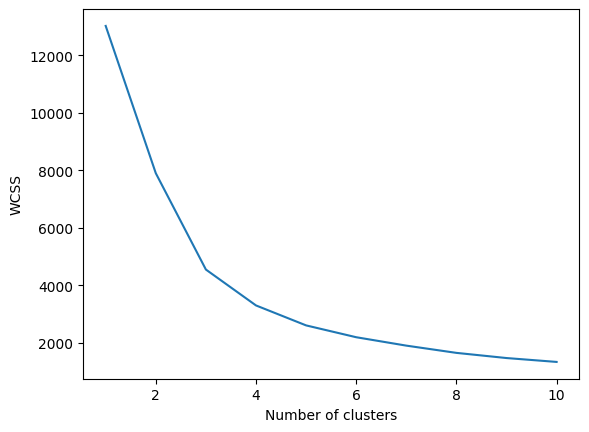

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Monetary,Frequency,Cluster_4,Cluster_3
0,2.332369,-0.581774,-0.718682,0,0
1,-0.901121,1.100935,0.922176,1,2
2,-0.170332,0.111124,-0.446717,3,1
3,-0.740948,0.095489,-0.065965,3,1
4,2.182207,-0.465109,-0.573634,0,0
...,...,...,...,...,...
4334,1.851851,-0.525693,-0.637093,0,0
4335,0.880803,-0.564998,-0.664289,0,0
4336,-0.851067,-0.527269,-0.628027,3,1
4337,-0.891110,0.208929,5.180432,1,2


In [ ]:
####Cluster by K-Mean####
from sklearn.cluster import KMeans

#find the best number of cluster by K-mean using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(rfm_Normed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


############################
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_Normed['Cluster_4'] = kmeans.fit_predict(rfm_Normed)


n_clusters = 3
kmeans_3 = KMeans(n_clusters=n_clusters, random_state=42)
rfm_Normed['Cluster_3'] = kmeans_3.fit_predict(rfm_Normed)

rfm_Normed

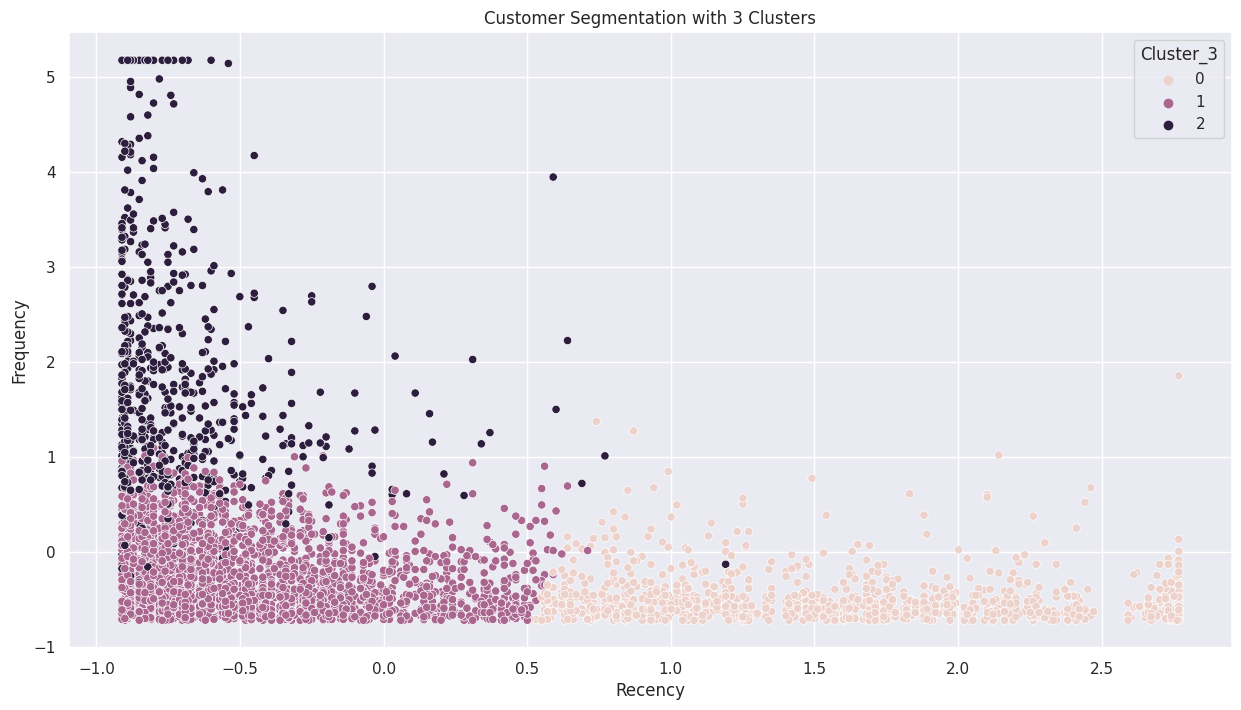

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(data=rfm_Normed,x='Recency',y='Frequency',hue='Cluster_3')
plt.title("Customer Segmentation with 3 Clusters")
plt.show()

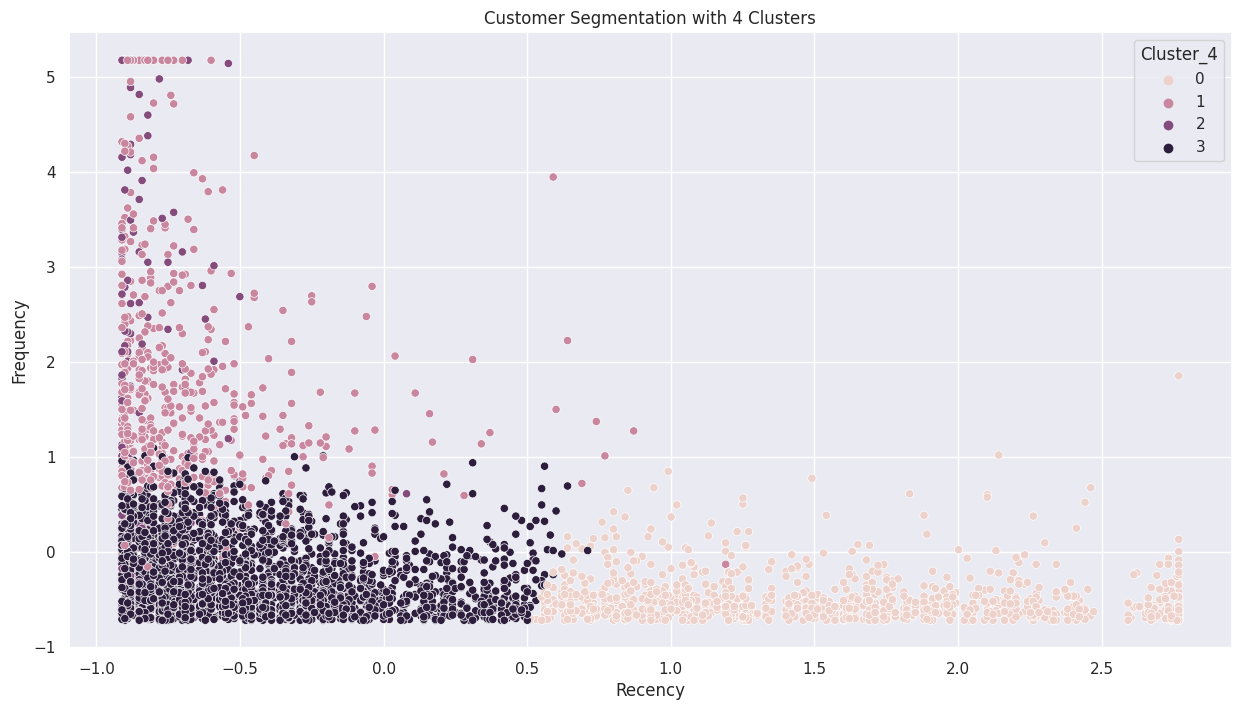

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(data=rfm_Normed,x='Recency',y='Frequency',hue='Cluster_4')
plt.title("Customer Segmentation with 4 Clusters")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(rfm_Normed, x='Recency', y='Monetary', z='Frequency', color='Cluster_4',
                    symbol='Cluster_4', # Use different symbols for clusters
                    opacity=0.5, # Set the opacity level of the points
                    size_max=10, # Set the maximum marker size
                    title="RFM Segmentation 3D Scatter Plot")

# Customizing the markers
fig.update_traces(marker=dict(size=3.5, # Set marker size
                              line=dict(width=0.5, # Set marker line width
                                        color='DarkSlateGrey'))) # Marker line color

# Customizing the layout of the plot
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Update the legend position
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=20,
    xanchor="left",
    x=50
))
fig.update_layout(
    width=1200,  # Width of the figure in pixels
    height=800  # Height of the figure in pixels
)
# Showing the plot
fig.show()

Cluster Analysis：

Cluster 0 (New Customers):
Recency: Customers in this cluster have likely made purchases recently.
Frequency: They have a lower frequency since they are new and have had less time to make repeat purchases.
Monetary: Their monetary value might be lower as they have only made a few purchases so far.
Profiling: This group represents new customers. Welcome campaigns and initial engagement efforts could help move them to a more loyal status.


Cluster 1 (Loyal Customers):
Recency: These customers have made purchases very recently.
Frequency: They purchase frequently, showing a pattern of regular engagement.
Monetary: They have a high monetary value, contributing significantly to revenue.
Profiling: This segment is the most valuable and should be the focus of retention strategies. They are likely to respond well to loyalty programs and exclusive offers.



Cluster 2 (Champions/High-Value Customers):
Recency: Similar to Cluster 2, these customers have also made recent purchases.
Frequency: The frequency of purchases is high, indicating consistent patronage.
Monetary: They have the highest monetary scores, indicating that they spend a lot.
Profiling: They are the 'Champions' of your customer base and could also be lever


Cluster 3 (Potential Loyalists/At Risk):
Recency: This cluster might have a mix of recent and less recent purchases.
Frequency: Customers in this cluster could be those who used to purchase frequently but have seen a drop in their purchasing frequency.
Monetary: They might have a moderate to high monetary value, indicating that they were once valuable customers.
Profiling: These could be past loyal customers who are at risk of churning. Targeted re-engagement campaigns might be effective.

### Marketing Recommendations
#### 1. New Customers
Characteristics: Recently made their first purchases.<br>
<b>Strategies</b>:
<ul>
<li>Welcome Campaigns: Send personalized welcome emails or messages, offering guidance or tips on using your products or services.</li>
<li>First-Time Buyer Offers: Encourage second purchases with special offers or discounts on their next purchase.</li>
<li>Educational Content: Provide information that helps them get the most out of their purchase.</li>
<li>Feedback Solicitation: Ask for their feedback on their first purchase experience to show that you value their opinion and to gather insights for improvements.</li>
</ul>
<br><br>

#### 2. Loyal Customers
Characteristics: Regularly purchase over a long period.<br>
<b>Strategies</b>:
<ul>
<li>Loyalty Programs: Implement a loyalty program that rewards repeat purchases, such as a points system that can be redeemed for discounts or gifts.</li>
<li>Exclusive Offers: Provide exclusive offers or early access to new products or sales.</li>
<li>Personalized Communication: Use their purchase history to send personalized recommendations and communications.</li>
<li>Customer Appreciation Events: Host special events or provide special services for loyal customers to make them feel valued.</li>
</ul>
<br><br>

#### 3. Champions/High-Value Customers
Characteristics: Frequent buyers, high spenders, and often brand advocates.<br>
<b>Strategies</b>:
<ul>
<li>VIP Treatment: Offer a VIP or premium service experience, including priority customer support.</li>
<li>Referral Programs: Encourage them to refer friends or family, possibly with incentives for both the referrer and the referee.</li>
<li>Exclusive Access: Provide them with early access to new products, exclusive merchandise, or special editions.</li>
<li>Community Building: Involve them in community events, focus groups, or co-creation opportunities to make them feel part of the brand's journey.</li>
</ul>
<br><br>

#### 4. Potential Loyalists/At Risk
Characteristics: Customers who have shopped more than once but are not frequent buyers.<br>
<b>Strategies</b>:
<ul>
<li>Re-engagement Campaigns: Target them with re-engagement campaigns that remind them of your brand’s value proposition.</li>
<li>Personalized Offers: Send tailored promotions based on their past purchase behavior or items they've shown interest in.</li>
<li>Surveys and Feedback Requests: Understand their needs or reasons for infrequent purchases and improve based on the feedback.</li>
<li>Educate About Products/Services: Inform them about the full range of your products or services that might interest them.</li>
</ul>

Number of Unique Customers: 4372
Summary Statistics for Orders per Customer:
count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: CustomerID, dtype: float64


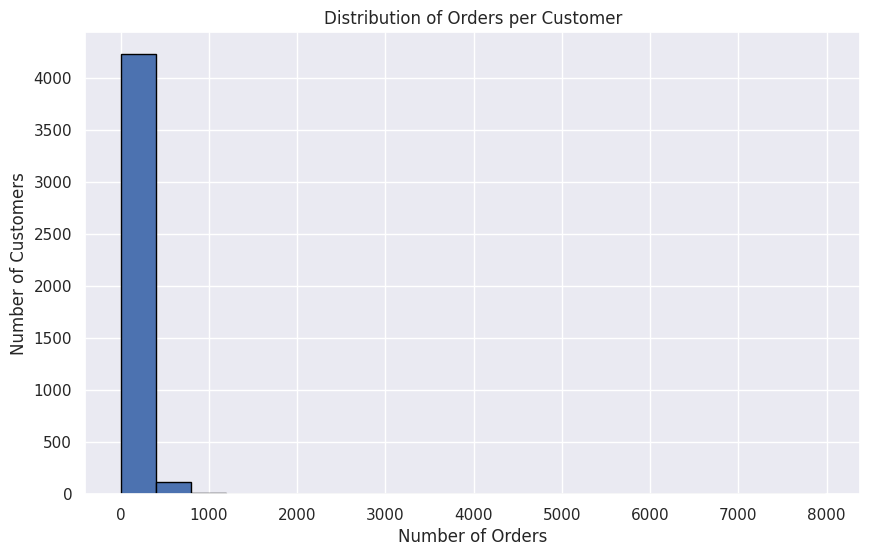

Top 5 customers by order count: 
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: CustomerID, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of Rows
df = pd.read_csv('data.csv',encoding = "ISO-8859-1")
df.shape[0]

# Unique Customers 2.1
unique_customers = df['CustomerID'].nunique()
print("Number of Unique Customers:", unique_customers)

# Distribution of Customers 2.2
orders_per_customer = df['CustomerID'].value_counts()

# Display summary statistics
print("Summary Statistics for Orders per Customer:")
print(orders_per_customer.describe())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=20, edgecolor='black')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Top 5 Customers 2.3
top_customers = df['CustomerID'].value_counts().head(5)
print("Top 5 customers by order count: ")
print(top_customers)

In [ ]:
import pandas as pd
import numpy as np

# 3.1 Top 10 Products
top = df['StockCode'].value_counts().head(10)

print("Top 10 Most Frequently Purchased Products:")
print(top)

# 3.2 Average price of products
avg_price = df['UnitPrice'].mean()

print("Average Price of Products:", avg_price, "Pounds")

# 3.3 Product category with Highest Revenue

category_revenue = df.groupby('StockCode')['UnitPrice'].sum()

# Identify the product category with the highest revenue
high_revenue = category_revenue.idxmax()
total_revenue_highest_category = category_revenue.max()

print("Product Category with Highest Revenue:", high_revenue)
print("Total Revenue for the Highest Category:", total_revenue_highest_category)

Top 10 Most Frequently Purchased Products:
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: StockCode, dtype: int64
Average Price of Products: 4.611113626088513 Pounds
Product Category with Highest Revenue: AMAZONFEE
Total Revenue for the Highest Category: 249042.68


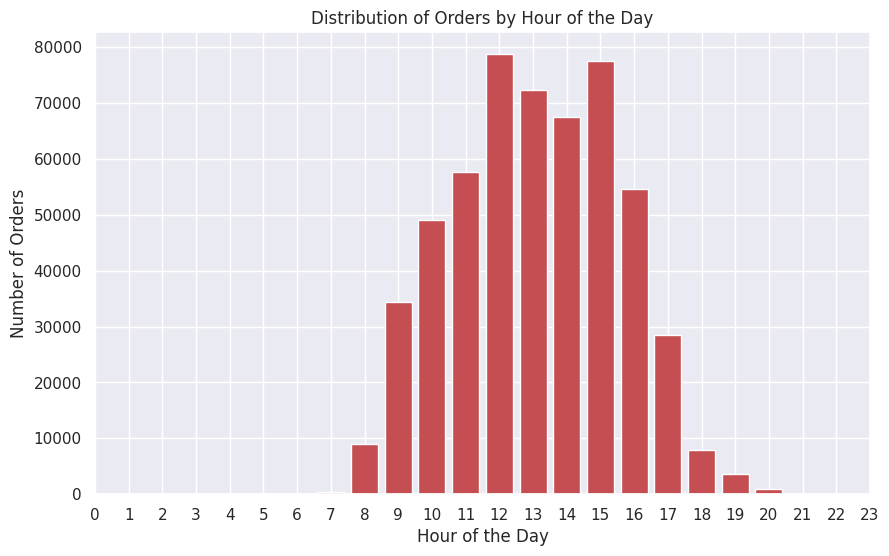

Hour with Most Orders: 12
Total Orders during the Most Active Hour: 78709
The average order processing time is: 0 days 00:00:00.370578824


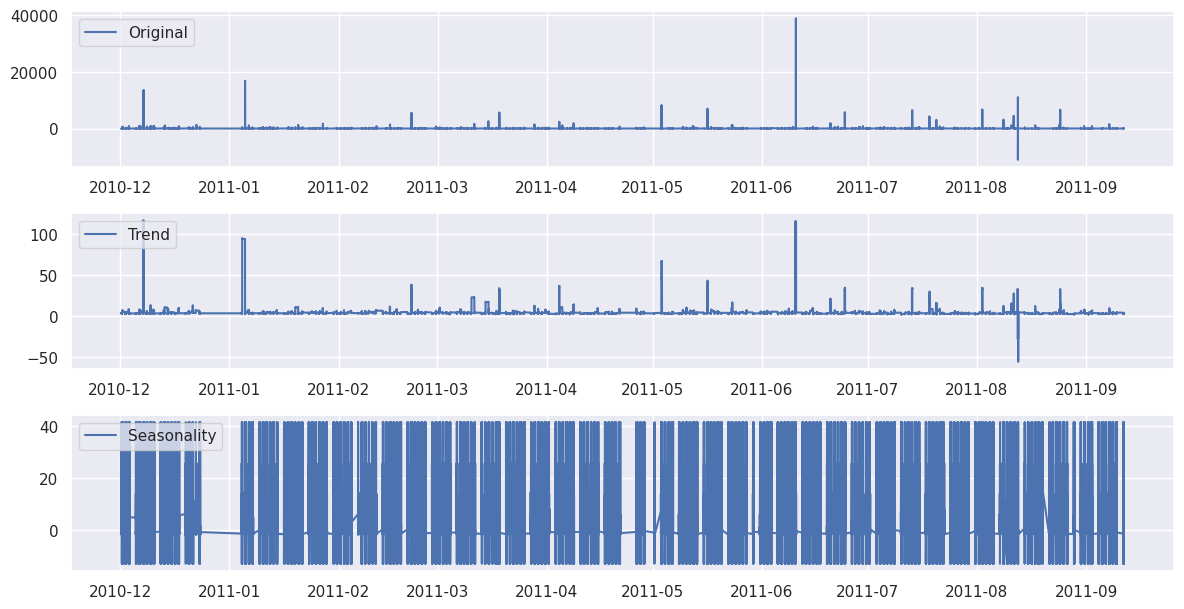

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

# 4.1 Time of Most Orders placed

# Convert to DateTime Obj

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date  # only keep date
df['Purchase_Time'] = df['InvoiceDate'].dt.time
#Convert to Hour
df['Purchase_Time'] = df['InvoiceDate'].dt.hour

# Group by hour and calculate the number of orders for each hour
orders_by_hour = df['Purchase_Time'].value_counts()

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(orders_by_hour.index, orders_by_hour.values, color='r')
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(0, 24, step=1))
plt.show()

most_orders_hour = orders_by_hour.idxmax()
total_orders_most_hour = orders_by_hour.max()

print("Hour with Most Orders:", most_orders_hour)
print("Total Orders during the Most Active Hour:", total_orders_most_hour)


# 4.2
df['OrderProcessingTime'] = df.groupby('InvoiceNo')['InvoiceDate'].transform(lambda x: x.max() - x.min())

# Calculate the average order processing time
average_processing_time = df['OrderProcessingTime'].mean()

print(f"The average order processing time is: {average_processing_time}")


# 4.3 Seasonal Trends

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter the dataset for a specific time window (e.g., one year)
start_date = pd.to_datetime('2010-01-12')  # Adjust the start date based on your data
end_date = pd.to_datetime('2011-09-12')    # Adjust the end date based on your data

df_window = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

# Set 'InvoiceDate' as the index of the DataFrame (required for decomposition)
df_window.set_index('InvoiceDate', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df_window['UnitPrice'], model='additive', period=365)  # Adjust the period based on your data

# Plot the original time series, trend, seasonality, and residuals
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_window['UnitPrice'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Top 5 Countries with the Highest Number of Orders:
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64
Correlation between Country and Average Order Value: 0.9999999999999998


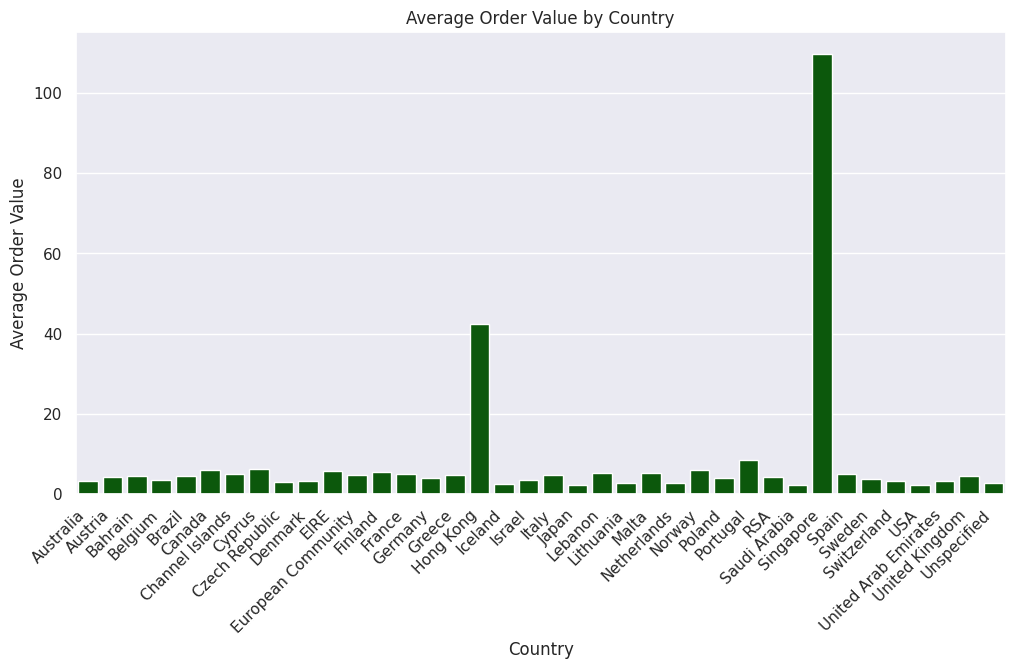

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 5.1 top 5 Countries with most orders
top_countries = df['Country'].value_counts().head(5)

print("Top 5 Countries with the Highest Number of Orders:")
print(top_countries)

# 5.2 Correlation between the country of the customer and the average order value.

average_order_value_by_country = df.groupby('Country')['UnitPrice'].mean()

correlation_matrix = df.groupby('Country')['UnitPrice'].mean().corr(df.groupby('Country')['UnitPrice'].mean())

print("Correlation between Country and Average Order Value:", correlation_matrix)

# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(x=average_order_value_by_country.index, y=average_order_value_by_country.values, color='DarkGreen')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.show()

6 Payment Analysis

In the given dataset, we have not been provided with any information which can be used to determine the payment method. As a result, it becomes difficult to identify the most common mode of payment or to establish any relationship with the payment method.

In [ ]:
# 7.1 Customer Behavior

df['Date'] = pd.to_datetime(df['InvoiceDate'])

customer_grouped = df.groupby('CustomerID')

customer_active_duration = customer_grouped['Date'].apply(lambda x: x.max() - x.min())
average_duration = customer_active_duration.mean()

print(f"Average duration of customer activity: {average_duration}")

Average duration of customer activity: 133 days 17:25:29.204025618


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



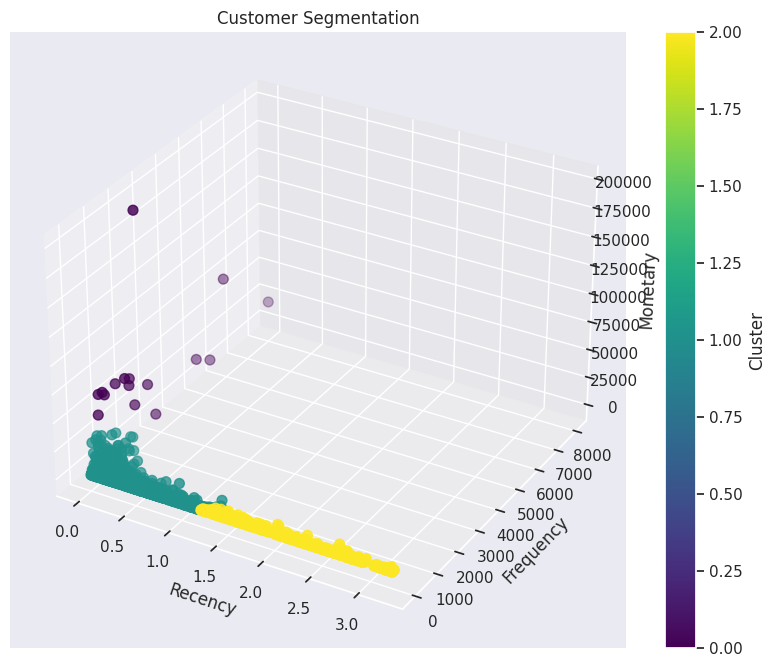

In [ ]:
# 7.2 To define customer segments based on purchase behavior.

recency = df['Date'].max() - customer_grouped['Date'].max()    #time since the last purchase
frequency = customer_grouped.size()    #number of purchases
monetary = customer_grouped['Quantity'].sum()    #total spending

rfm_df = pd.DataFrame({
        'Recency': recency,
        'Frequency': frequency,
        'Monetary': monetary
        })

normalized_rfm = (rfm_df - rfm_df.mean()) / rfm_df.std()
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(normalized_rfm)

# Display the resulting DataFrame with clusters
#print(rfm_df)


# Visualization
from mpl_toolkits.mplot3d import Axes3D

# Plotting 3D scatter plot for clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Segmentation')

colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Cluster')

plt.show()

In [ ]:
# 8
# The given data set does not explicitly specify an order was returned or refunded. However the dataset does state if an order was cancelled.
# This information can be used to estimate the percentage of orders returned or refunded.
# Also, no information has been provided on product category due to which we cannot establish any relationship with product category.

df['order_canceled'] = df['InvoiceNo'].apply(lambda x:int('C' in x))
display(df[df['order_canceled'] == 1].head())

x1 = df['order_canceled'].sum()
x2 = df.shape[0]

print('Number of orders canceled: {}'.format(x1))
print('Percentage of orders canceled: {}/{} * 100 = ({:.2f}%) '.format(x1, x2, x1/x2*100))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Purchase_Time,OrderProcessingTime,order_canceled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01 09:41:00,9,0 days,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01 09:49:00,9,0 days,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01 10:24:00,10,0 days,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,10,0 days,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01 10:24:00,10,0 days,1


Number of orders canceled: 9288
Percentage of orders canceled: 9288/541909 * 100 = (1.71%) 


9 Profitability Analysis

To compute the profit, we require the cost price and selling price of a product. We can compute the total profit using the below formula.
<p>
Profit_Per_Record = (SellingPrice - UnitPrice) * Quantity <br>
Total Profit = summation of Profit_Per_Record column
<p>

The selling price and quantity have been recorded under the fields of UnitPrice and Quantity respectively. However, we do not have any information on the cost price of each product.

Hence, currently we are unable to determine the total profit made. However, the same can be determined once the data on cost price is made available.

10 Customer Satisfaction

No, there isn't any data available on customer feedback or ratings for products or services.